# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:



In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
#Loading the data (which is stored in the file train.csv)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [88]:
#Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
test_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


Description Here:
NOX - Mean .54, stdev .12, min .39, max .871, 50%/median = .58 - may be some outliers since IQR is smaller than the stdev. Skewed right - more dewellings in the lower end, tail on the right side.

<IPython.core.display.Javascript object>


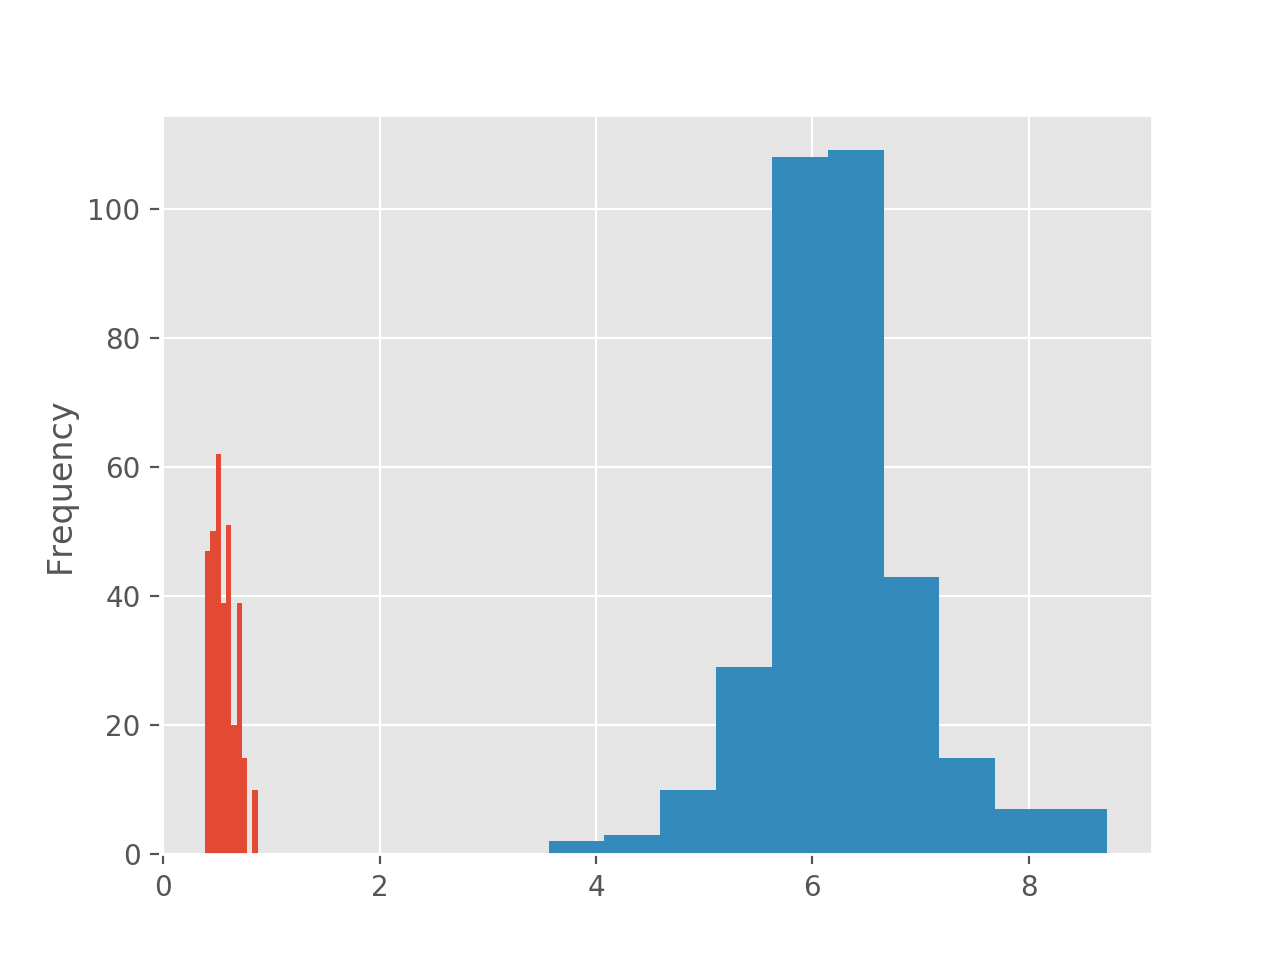

In [89]:
train_df.nox.plot.hist()

Rooms per dwelling: average is 6, std .7 min 4 roms, max 8.78, median 5.89 pretty close, . IQR between 4.1-6.6, so mean it's on the higher end of the IQR. but if we look at stdev 6.7 to 5.3 range - a little bit higher but histogram shows fairly evenly distributed.

In [90]:
train_df.rm.plot.hist()

pupil to student ratio.
mean 18.46, stdev is 2.1, min is 12.6, max 22, IQR 17-20, median at 19, so slightly lower mean to median. means there are outliers on the low end. skewed left (more on the higher end).

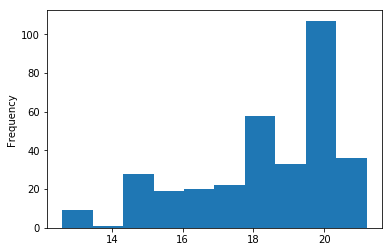

In [13]:
train_df.ptratio.plot.hist()

* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:

    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.

#### My two datasets splits
* rooms per dwelling, pupils student ration, age and average price
* indus, nitrogen oxides, chas and average price - how does environmental issues affect price? 

In [91]:
high_ptratio_df = train_df.loc[ train_df['ptratio'] >=19]
low_ptratio_df = train_df.loc[ train_df['ptratio'] <19]
low_ptratio_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [92]:
high_ptratio_df.rm.describe(), low_ptratio_df.rm.describe()

(count    168.000000
 mean       6.020946
 std        0.597607
 min        3.561000
 25%        5.808250
 50%        6.082000
 75%        6.405000
 max        8.259000
 Name: rm, dtype: float64, count    165.000000
 mean       6.514739
 std        0.718158
 min        4.926000
 25%        6.021000
 50%        6.383000
 75%        6.968000
 max        8.725000
 Name: rm, dtype: float64)

In [93]:
high_ptratio_df.tax.describe(), low_ptratio_df.tax.describe()

(count    168.000000
 mean     509.208333
 std      182.114258
 min      188.000000
 25%      307.000000
 50%      666.000000
 75%      666.000000
 max      711.000000
 Name: tax, dtype: float64, count    165.000000
 mean     307.533333
 std       68.328790
 min      193.000000
 25%      256.000000
 50%      300.000000
 75%      370.000000
 max      432.000000
 Name: tax, dtype: float64)

In [94]:
high_ptratio_df.medv.describe(), low_ptratio_df.medv.describe()

(count    168.000000
 mean      18.593452
 std        7.467953
 min        5.000000
 25%       13.800000
 50%       18.650000
 75%       22.050000
 max       50.000000
 Name: medv, dtype: float64, count    165.00000
 mean      27.02000
 std        8.80485
 min       13.10000
 25%       21.20000
 50%       24.00000
 75%       32.00000
 max       50.00000
 Name: medv, dtype: float64)

In [95]:
river_houses_df = train_df.loc[ train_df['chas'] == 1]
notriver_houses_df = train_df.loc[ train_df['chas'] == 0]

In [96]:
river_houses_df.nox.describe(), notriver_houses_df.nox.describe()

(count    20.000000
 mean      0.593595
 std       0.146237
 min       0.401000
 25%       0.489000
 50%       0.528500
 75%       0.693500
 max       0.871000
 Name: nox, dtype: float64, count    313.000000
 mean       0.554815
 std        0.112555
 min        0.385000
 25%        0.453000
 50%        0.538000
 75%        0.624000
 max        0.871000
 Name: nox, dtype: float64)

In [97]:
river_houses_df.indus.describe(), notriver_houses_df.indus.describe()

(count    20.000000
 mean     12.330000
 std       6.505255
 min       1.210000
 25%       6.200000
 50%      12.240000
 75%      18.100000
 max      19.580000
 Name: indus, dtype: float64, count    313.000000
 mean      11.227252
 std        7.032974
 min        0.740000
 25%        4.950000
 50%        9.690000
 75%       18.100000
 max       27.740000
 Name: indus, dtype: float64)

In [98]:
river_houses_df.zn.describe(), notriver_houses_df.zn.describe()

(count    20.000000
 mean      8.500000
 std      21.830688
 min       0.000000
 25%       0.000000
 50%       0.000000
 75%       0.000000
 max      90.000000
 Name: zn, dtype: float64, count    313.000000
 mean      10.829073
 std       22.754198
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%       12.500000
 max      100.000000
 Name: zn, dtype: float64)

* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

In [99]:
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


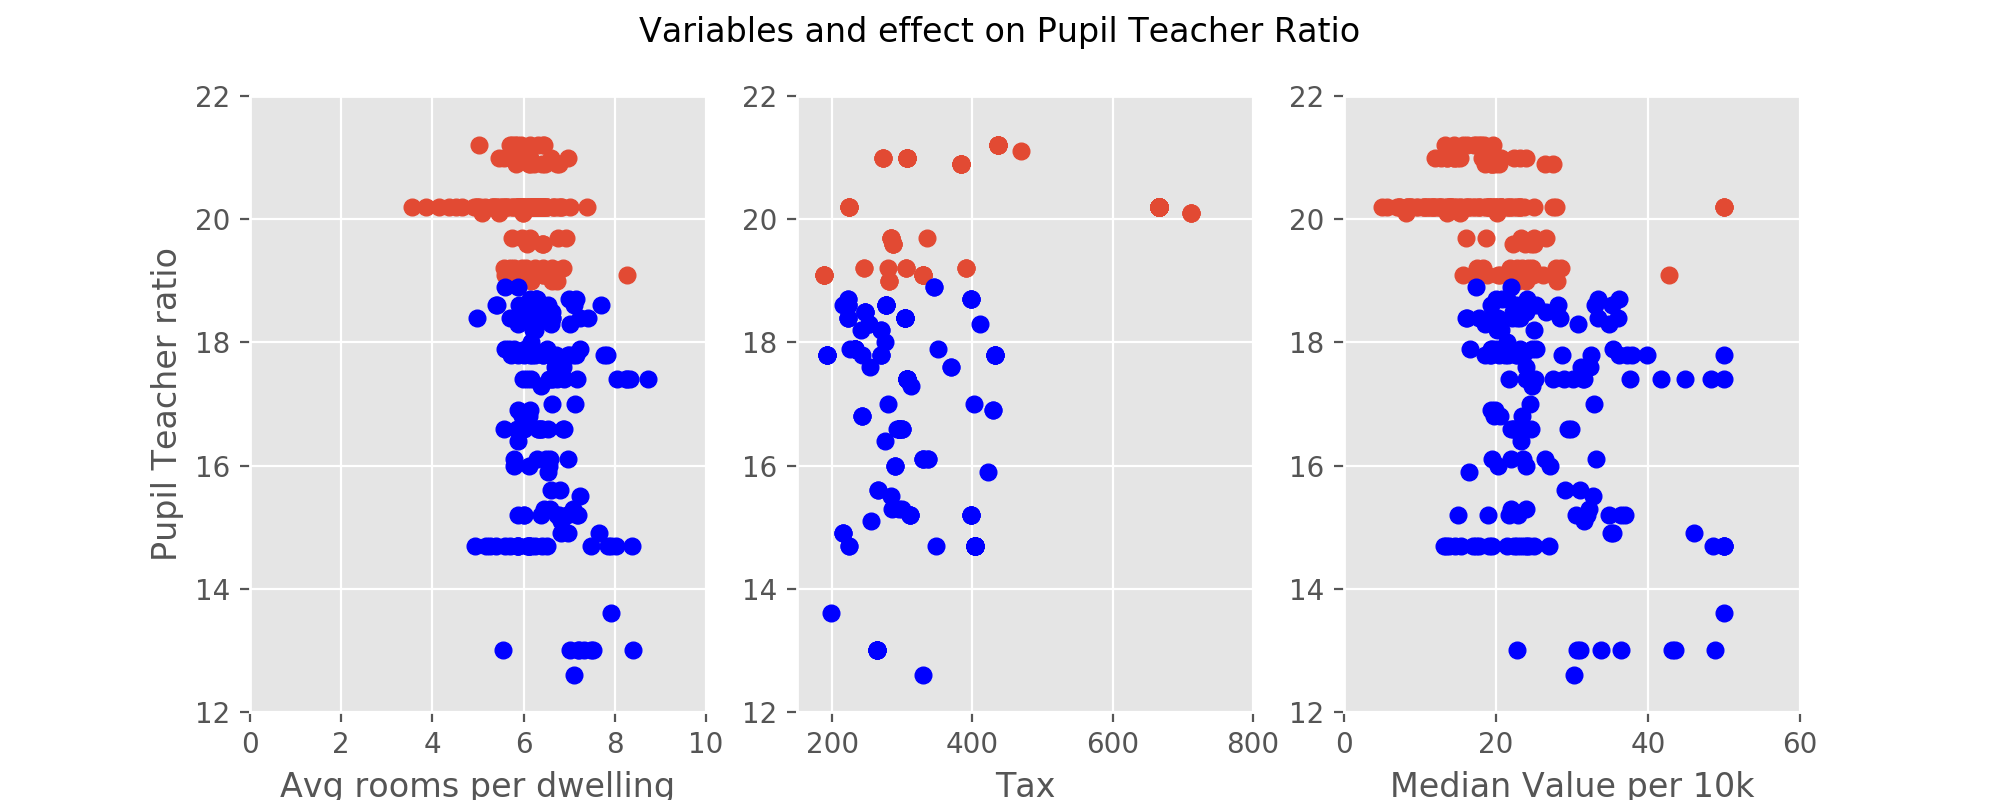

In [131]:
fig = plt.figure(figsize=[10,4])
fig.suptitle("Variables and effect on Pupil Teacher Ratio")

#room size on teacher ration
ax1 = fig.add_subplot(131)
ax1.scatter(high_ptratio_df['rm'] , high_ptratio_df['ptratio'])
ax1.set_xlim(0,10)
ax1.set_ylim(12,22)
ax1.set_ylabel('Pupil Teacher ratio')
ax1.set_xlabel('Avg rooms per dwelling')
ax1.scatter(low_ptratio_df['rm'], low_ptratio_df['ptratio'], color='blue')


#tax on teacher ratio
ax3 = fig.add_subplot(132)
ax3.scatter(high_ptratio_df['tax'], high_ptratio_df['ptratio'])
ax3.set_ylim(12,22)
ax3.set_xlim(150,800)
ax3.scatter(low_ptratio_df['tax'], low_ptratio_df['ptratio'], color='blue')
ax3.set_xlabel('Tax')

#medv on teacher ratio
ax5 = fig.add_subplot(133)
ax5.scatter(high_ptratio_df['medv'], high_ptratio_df['ptratio'])
ax5.set_ylim(12,22)
ax5.set_xlim(0,60)

# ax6 = fig.add_subplot(236)
ax5.scatter(low_ptratio_df['medv'], low_ptratio_df['ptratio'], color='blue')
# ax6.set_ylim(12,22)
# ax6.set_xlim(0,60)
ax5.set_xlabel('Median Value per 10k')


plt.show()

The tables show that only Median Value per 10k seem to only differentiate Pupil teacher ration - though still a high degree of overlap.

<IPython.core.display.Javascript object>


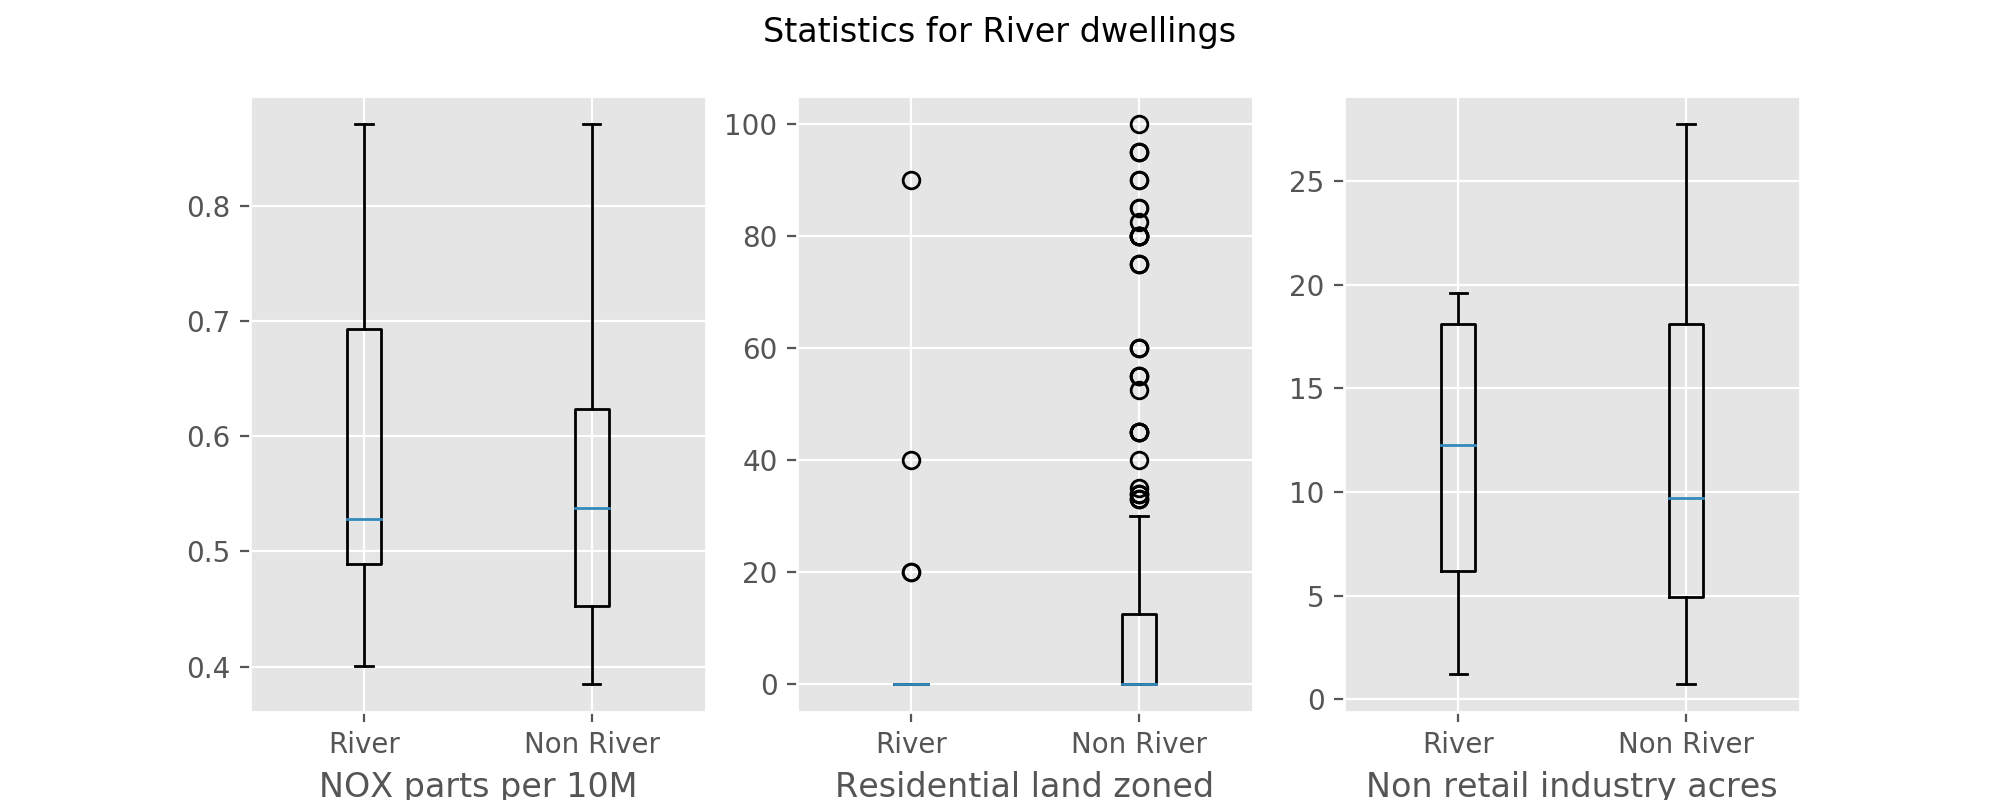

In [138]:
fig2 = plt.figure(figsize=[10,4])
fig2.suptitle("Statistics for River dwellings")
labels = ['River', 'Non River' ]
#room size on teacher ration
ax_r = fig2.add_subplot(131)
ax_r.boxplot([river_houses_df['nox'], notriver_houses_df['nox']])
ax_r.set_xlabel('NOX parts per 10M')
plt.xticks(np.arange(len(labels))+1,labels)

ax2 = fig2.add_subplot(132)
ax2.boxplot([river_houses_df['zn'], notriver_houses_df['zn']])
ax2.set_xlabel('Residential land zoned')
plt.xticks(np.arange(len(labels))+1,labels)
ax3 = fig2.add_subplot(133)
ax3.boxplot([river_houses_df['indus'], notriver_houses_df['indus']])
ax3.set_xlabel('Non retail industry acres')
plt.xticks(np.arange(len(labels))+1,labels)
plt.show()

We really need t-tests to tell if River/Non-River has any of these variables have an effect. There's a high decgree of overlap, and the means are close. Similarly, I'm not sure how toxic NOX parts per 10M is, it may be so insignificant to humans etc that it really is no difference, or it may hugely affect the health of humans. Domain knoweldge is necessary in addition to statistical knowledge. 

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!